# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats 
import pylab

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/karl/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


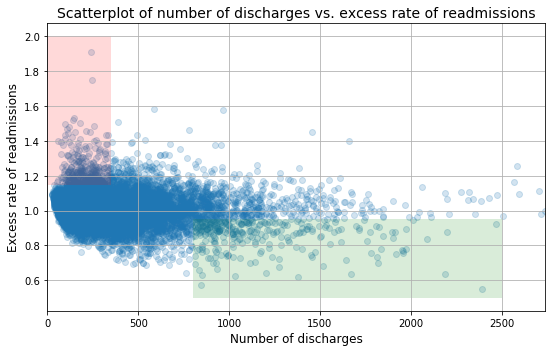

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilities with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [7]:
hospital_dropna_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
hospital_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


### A. Do you agree with the above analysis and recommendations? Why or why not?

The analysis seems to base its conclusion on one scatterplot. I cannot agree with the above analysis and recommendations because there is not enough evidence to support it. Further investigation and statistical analysis should be completed to determine whether there is a significant correlation between hospital capacity (number of discharges) and readmission rates. It may be possible that the correlation may have come from chance.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1) Setup an appropriate hypothesis test.

$H_0$: There is no statistically significant correlation between number of discharges and readmission rates.

$H_A$: There is a statistically significant negative correlation between number of discharges and readmission rates.

#### 2) Compute and report the observed significance value (or p-value).

In [13]:
number_of_discharges = hospital_dropna_df['Number of Discharges']
excess_readmission_ratio = hospital_dropna_df['Excess Readmission Ratio'] 

pearson_r = np.corrcoef(number_of_discharges, excess_readmission_ratio)[0, 1]

print('The Pearson correlation coefficient of the sample is', pearson_r)

The Pearson correlation coefficient of the sample is -0.0973979435108


In [9]:
len_perm_repl = 100000
permutation_replicates = np.empty(len_perm_repl)

for i in range(len_perm_repl):
    number_of_discharges_perm = np.random.permutation(number_of_discharges)
    permutation_replicates[i] = np.corrcoef(number_of_discharges_perm, excess_readmission_ratio)[0, 1]

p = np.sum(permutation_replicates <= pearson_r) / len_perm_repl 

print('A permutation replicates of',len_perm_repl,' iterations had a',p,
      'percentage of values less than or equal to the',pearson_r,
      'pearson correlation value.')

A permutation replicates of 100000  iterations had a 0.0 percentage of values less than or equal to the -0.0973979435108 pearson correlation value.


<function matplotlib.pyplot.show>

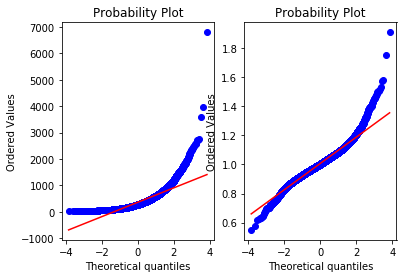

In [10]:
plt.subplot(121)
stats.probplot(number_of_discharges, dist='norm', plot=plt)
plt.subplot(122)
stats.probplot(excess_readmission_ratio, dist='norm', plot=plt)
plt.show


In [11]:
coer, p_value = stats.spearmanr(number_of_discharges, excess_readmission_ratio)
print('Spearman correlation: %s, p_value: %s'%(coer, p_value))

Spearman correlation: -0.0771294053707, p_value: 1.21564596596e-16


The Pearson correlation coefficient of -1 would be a strong indicator of a negative slope. The -0.0974 correlation is little, but for large datasets over 500 this can be more significant than for smaller datasets. Plus, with the p values of 0 looks in favor of a negative correlation. But since the number of discharges nor the excess readmission ratios were not yet shown to be normal distributions, we are going to jump to Spearman correlation, which does not assume that both datasets are normally distributed. The Spearman correlation of -0.0771 coupled with a p value of essential 0 shows  that it is statical significant. This means our null hypothesis ($H_0$) should be rejected and the alternate hypothesis is more likely. There is a small statistically significant negtive correlation between number of discharges and readmission rates. 

#### 3) Report statistical significance for  α  = .01.

Since the p value was calculated to be extremely small, we can still conclude it to be statistically significant with an alpha of 0.01.

#### 4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance refers to how unlikely the Pearson and Spearman correlation observed in the samples have occurred due to sampling errors. We can use it in hypothesis testing. Statistical significance tells us whether the value we were looking at, (in this case - Pearson or Searman correlation) occurred due to chance. Because the p value we calculated was so small, we can conclude that the correlation was statistically significant and that there likely is a negative correlation between number of discharges and readmission rates.

Practical significance looks at whether the Spearman correlation is large enough to be a value that shows a significant relationship. Practical significance looks at the value itself. In this case, the Spearman correlation was very small (-0.077). There probably is a negative correlation. However it is so small and close to zero that it is not very significant to the relationship between number of discharges and readmission rates.

Overall, size or number of discharges is not a good predictor for readmission rates. The recommendations above should not be followed. Instead further analysis should be performed to figure out what data has a higher correlation with readmission rates.

#### 5) Look at the scatterplot above.
* What are the advantages and disadvantages of using this plot to convey information?
* Construct another plot that conveys the same information in a more direct manner.

This plot above is able to display all of the data points at once. Sometimes a quick visual like this will indicate a relationship. However, it is hard to tell with this plot alone due to the data. If the plot included a line which showed the value of the negative correlation, it would more clearly present the relationship of the data.

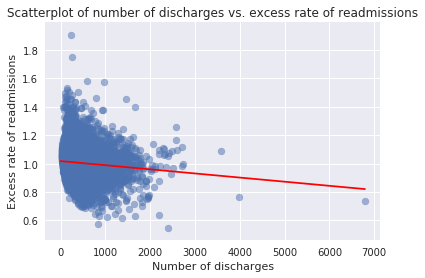

In [12]:
import seaborn as sns

sns.set()
plt.scatter(number_of_discharges, excess_readmission_ratio, alpha=0.5)

slope, intercept = np.polyfit(number_of_discharges, excess_readmission_ratio, 1)

x = np.array([0, max(number_of_discharges)])
y = slope * x + intercept

plt.plot(x, y, color='red')

plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions')

plt.show()

While EDA scatter plot with polyfit line does show the slight negative correlation, the plot also brings up a possible area for further analysis might be hospitals with excessive rate of readmissions above 1.35 and less than 2,000 discharges.